In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 162 GB / percent used: 35.6 %


# Check model data

In [2]:
root_CM7 = '/ccc/store/cont003/thredds/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'

folder_CM7 = 'ATM'
var_CM7_ua = 'ua'
# var_CM7_ps = 'psol'

path_CM7_ua = root_CM7+'/'+folder_CM7+'/Analyse/TS_MO/'+\
    'CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_CM7_ua+'.nc'

# path_CM7_ps = root_CM7+'/'+folder_CM7+'/Analyse/TS_MO/'+\
#     'CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_CM7_ps+'.nc'

In [3]:
root_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

var_CM6_ua = 'ua'
# var_CM6_ps = 'ps'
table_CM6 = 'Amon'

path_CM6_ua = root_CM6+'/'+table_CM6+'/'+var_CM6_ua+'/gr/latest/'\
    +var_CM6_ua+'_'+table_CM6+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'

# path_CM6_ps = root_CM6+'/'+table_CM6+'/'+var_CM6_ps+'/gr/latest/'\
#     +var_CM6_ps+'_'+table_CM6+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'

In [4]:
xr.open_dataset(path_CM7_ua)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, plev: 17, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * plev                  (plev) float32 100000.0 92500.0 ... 2000.0 1000.0
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    ua                    (time_counter, plev, lat, lon) float32 ...
Attributes:
    name:         histmthNMC
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:51:21 GMT
    uuid:         0ad2c610-3b43-4165-9f3e-0e3924307449
    LongName:     IPSLCM6.1.11-LR

In [5]:
xr.open_dataset(path_CM6_ua)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, plev: 19, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * plev         (plev) float32 100000.0 92500.0 85000.0 ... 1000.0 500.0 100.0
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ua           (time, plev, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:33:58Z
    tracking_id:           hdl:21.14100/66d3aef6-384f-413a-912d-4275467332bd
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 atmos
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              Amon
    variable_id:           ua
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:17:17 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

### Check temperatures

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


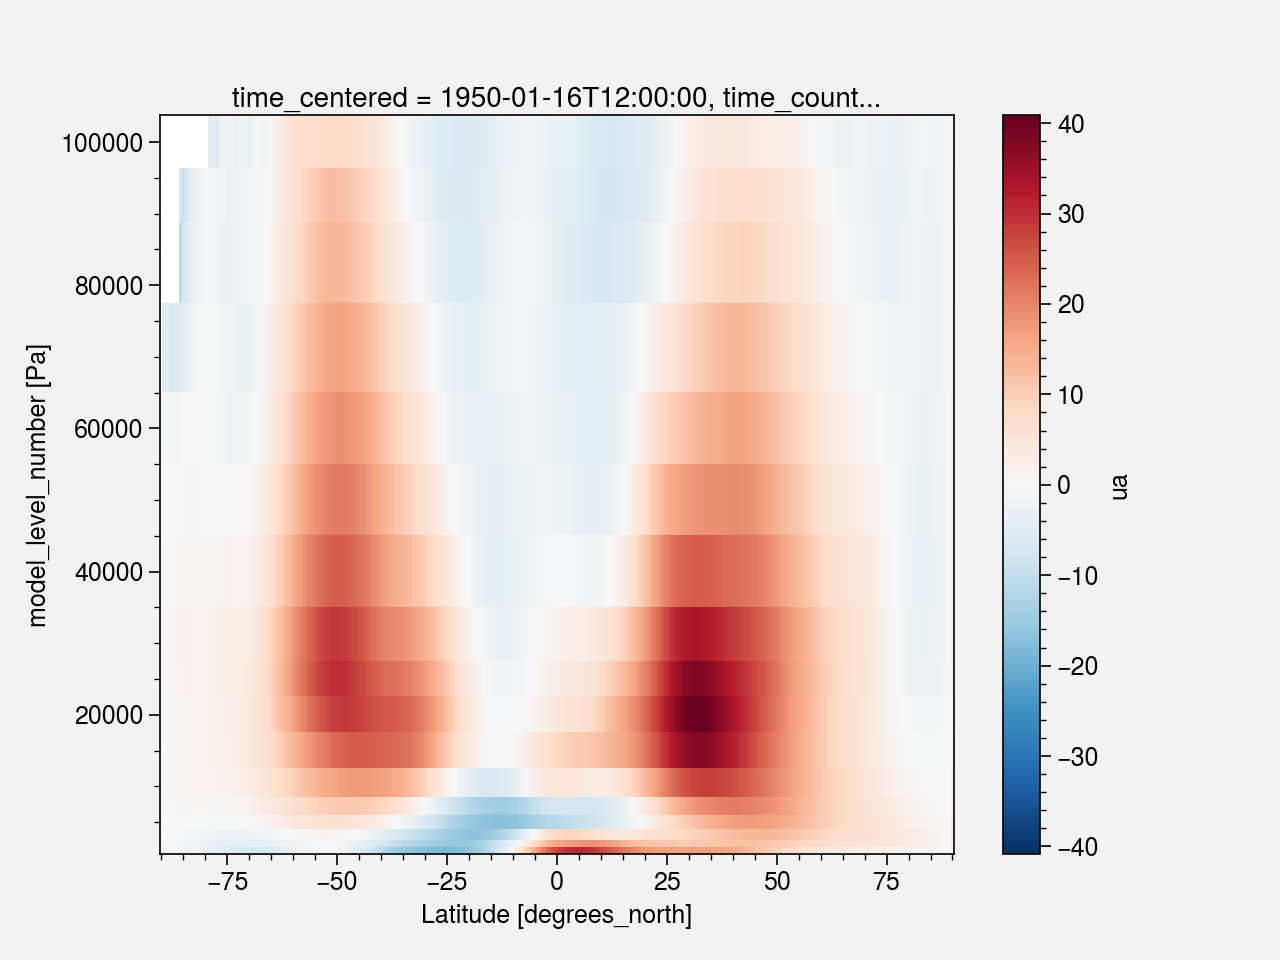

In [6]:
xr.open_dataset(path_CM7_ua)[var_CM7_ua].isel(time_counter=0).mean('lon', skipna=True).plot()

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


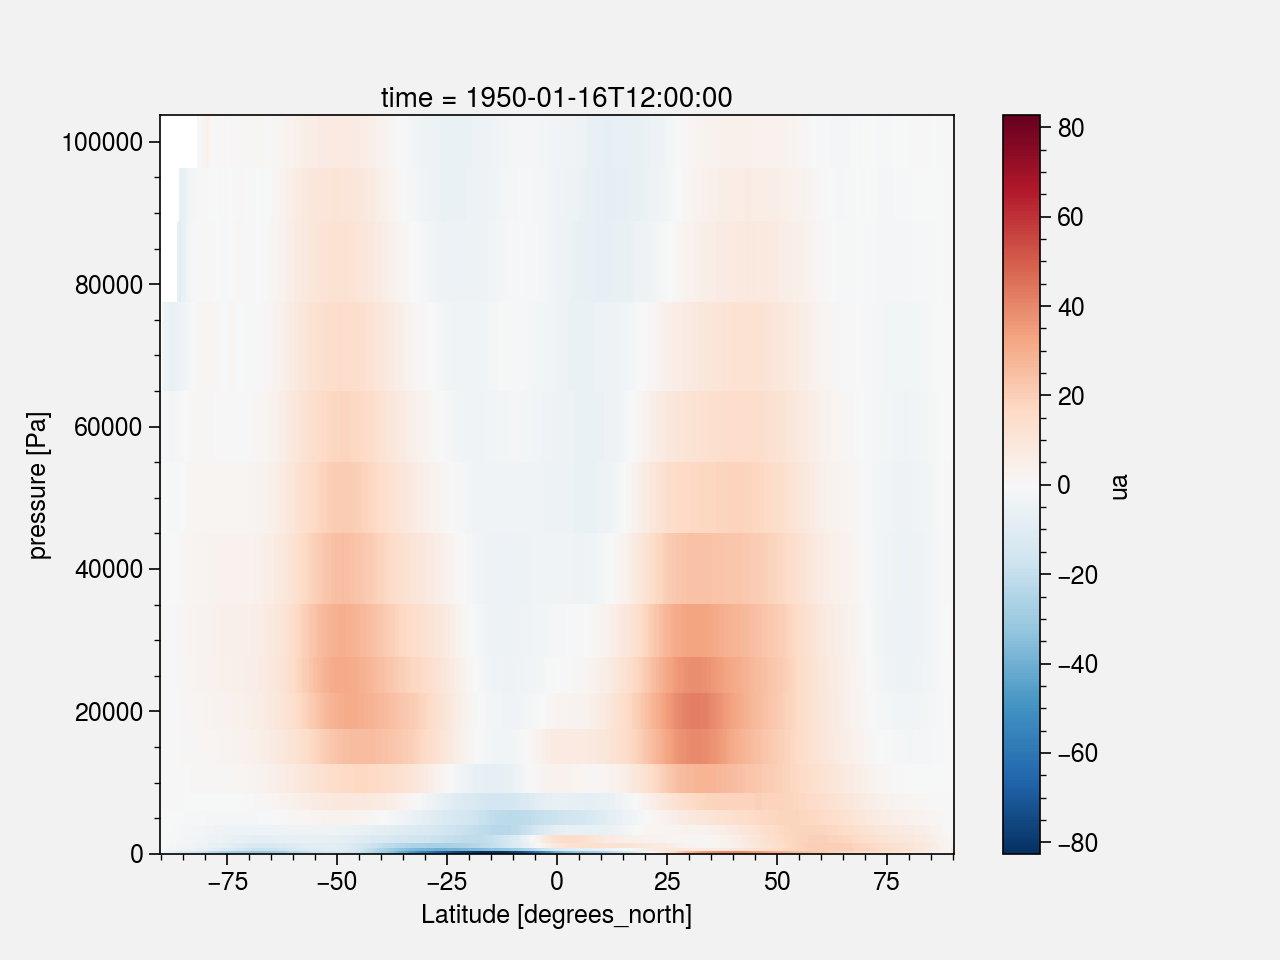

In [7]:
xr.open_dataset(path_CM6_ua)[var_CM6_ua].isel(time=0).mean('lon', skipna=True).plot()

# Define period and zone

In [10]:
# Define common period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Get model data

In [18]:
model_CM7_clim = xr.open_dataset(path_CM7_ua)[var_CM7_ua].sel(time_counter=period).mean('time_counter', skipna=True)
model_CM7_clim

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'ua' (plev: 17, lat: 360, lon: 720)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.9972645 , -0.9972589 , -0.9972413 , ..., -0.9972108 ,
         -0.9972413 , -0.9972589 ],
        [-1.0415251 , -1.0415226 , -1.0415176 , ..., -1.04151   ,
         -1.0415176 , -1.0415226 ],
        [ 0.18431647,  0.18431647,  0.18431647, ...,  0.18431647,
          0.18431647,  0.18431647]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.6806074 , -0.6806166 , -0.68064356, ..., -0.6806892 ,
         -0.68064356, -0.6806166 ],
        [-0.741162  , -0.7411636 , -0.74116904, ..., -0.7411774 ,
         -0.74116904, -0.7411636 ],
        [ 0.2492727 ,  0.2492727 ,  0.2492727 , ...,  0.2492727 ,
          0.2492727 ,  0.2492727 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.59670746, -0.5967209 , -0.59676105, ..., -0.596828  ,
         -0.59676105, -0.5967209 ],
        [-0.6916744 , -0.69167686, -0.6916848 , ..., -0.6916976 ,
         -0.6916848 , -0.69167686],
        [ 0.23351873,  0.23351873,  0.23351873, ...,  0.23351873,
          0.23351873,  0.23351873]],

       ...,

       [[ 1.8569858 ,  1.8569858 ,  1.8569858 , ...,  1.8569858 ,
          1.8569858 ,  1.8569858 ],
        [-2.566156  , -2.6985369 , -2.700118  , ..., -2.423183  ,
         -2.4275587 , -2.4318016 ],
        [-2.3194299 , -2.427443  , -2.4327934 , ..., -2.19501   ,
         -2.202363  , -2.2097616 ],
        ...,
        [-2.431768  , -2.4317858 , -2.4318364 , ..., -2.4319196 ,
         -2.4318364 , -2.4317858 ],
        [-2.5602982 , -2.560302  , -2.5603142 , ..., -2.5603325 ,
         -2.5603142 , -2.560302  ],
        [ 0.9784353 ,  0.9784353 ,  0.9784353 , ...,  0.9784353 ,
          0.9784353 ,  0.9784353 ]],

       [[ 1.9944122 ,  1.9944122 ,  1.9944122 , ...,  1.9944122 ,
          1.9944122 ,  1.9944122 ],
        [-3.0146391 , -3.1287386 , -3.1296833 , ..., -2.8899174 ,
         -2.8941338 , -2.8982208 ],
        [-2.7554202 , -2.8479998 , -2.852291  , ..., -2.647668  ,
         -2.6542742 , -2.6609364 ],
        ...,
        [-3.3350885 , -3.335104  , -3.3351512 , ..., -3.335225  ,
         -3.3351512 , -3.335104  ],
        [-3.4505534 , -3.450556  , -3.4505658 , ..., -3.450584  ,
         -3.4505658 , -3.450556  ],
        [ 0.99861264,  0.99861264,  0.99861264, ...,  0.99861264,
          0.99861264,  0.99861264]],

       [[ 1.9592061 ,  1.9592061 ,  1.9592061 , ...,  1.9592061 ,
          1.9592061 ,  1.9592061 ],
        [-3.3756783 , -3.4418478 , -3.4415379 , ..., -3.300277  ,
         -3.303632  , -3.306887  ],
        [-3.1306415 , -3.1812458 , -3.1829467 , ..., -3.0692937 ,
         -3.0735743 , -3.0779264 ],
        ...,
        [-4.289592  , -4.289605  , -4.2896414 , ..., -4.2897034 ,
         -4.2896414 , -4.289605  ],
        [-4.3802657 , -4.380267  , -4.3802743 , ..., -4.380285  ,
         -4.3802743 , -4.380267  ],
        [ 0.75299096,  0.75299096,  0.75299096, ...,  0.75299096,
          0.75299096,  0.75299096]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.498604 -88.997215 ... 89.498604 90.0
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5

In [15]:
model_CM6_clim = xr.open_dataset(path_CM6_ua)[var_CM6_ua].sel(time=period).mean('time', skipna=True)
model_CM6_clim

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'ua' (plev: 19, lat: 361, lon: 512)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.5626183 , -0.5642744 , -0.56664103, ..., -0.5547935 ,
         -0.55652803, -0.5587252 ],
        [-0.5993423 , -0.6018913 , -0.6031208 , ..., -0.59590334,
         -0.59668815, -0.5984066 ],
        [-0.13265428, -0.13265428, -0.13265428, ..., -0.13265428,
         -0.13265428, -0.13265428]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.5733253 , -0.5763279 , -0.57928866, ..., -0.56400687,
         -0.56712466, -0.5701875 ],
        [-0.6690297 , -0.67123914, -0.6733575 , ..., -0.6618962 ,
         -0.66434264, -0.66668665],
        [-0.13557748, -0.13557748, -0.13557748, ..., -0.13557748,
         -0.13557748, -0.13557748]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.39923978, -0.4011418 , -0.4030195 , ..., -0.39336145,
         -0.395317  , -0.3972781 ],
        [-0.52209544, -0.5231216 , -0.524113  , ..., -0.5185863 ,
         -0.5197935 , -0.52096725],
        [-0.0378541 , -0.0378541 , -0.0378541 , ..., -0.0378541 ,
         -0.0378541 , -0.0378541 ]],

       ...,

       [[ 1.171782  ,  1.171782  ,  1.171782  , ...,  1.171782  ,
          1.171782  ,  1.171782  ],
        [-3.569118  , -3.5823884 , -3.594235  , ..., -3.5246146 ,
         -3.540162  , -3.554821  ],
        [-3.083428  , -3.0962775 , -3.1086178 , ..., -3.0402095 ,
         -3.0553741 , -3.069677  ],
        ...,
        [-7.824578  , -7.8551865 , -7.8847437 , ..., -7.7260957 ,
         -7.760003  , -7.79286   ],
        [-8.147314  , -8.1785    , -8.208467  , ..., -8.046714  ,
         -8.081437  , -8.1149645 ],
        [-2.636881  , -2.636881  , -2.636881  , ..., -2.636881  ,
         -2.636881  , -2.636881  ]],

       [[ 0.33936706,  0.33936706,  0.33936706, ...,  0.33936706,
          0.33936706,  0.33936706],
        [-3.8838837 , -3.8873162 , -3.8877292 , ..., -3.870607  ,
         -3.8755188 , -3.8804564 ],
        [-3.416743  , -3.4192762 , -3.4210908 , ..., -3.4044802 ,
         -3.4092872 , -3.4133735 ],
        ...,
        [-8.715024  , -8.733581  , -8.7509365 , ..., -8.651563  ,
         -8.673932  , -8.6950865 ],
        [-9.014121  , -9.032693  , -9.050012  , ..., -8.950336  ,
         -8.972925  , -8.994186  ],
        [-1.5683465 , -1.5683465 , -1.5683465 , ..., -1.5683465 ,
         -1.5683465 , -1.5683465 ]],

       [[-1.1451954 , -1.1451954 , -1.1451954 , ..., -1.1451954 ,
         -1.1451954 , -1.1451954 ],
        [-2.8589349 , -2.8450673 , -2.8231921 , ..., -2.9042513 ,
         -2.888326  , -2.8768783 ],
        [-2.6338701 , -2.617683  , -2.6001556 , ..., -2.680014  ,
         -2.6649413 , -2.650172  ],
        ...,
        [-5.3015485 , -5.2734947 , -5.2445445 , ..., -5.3808656 ,
         -5.3551188 , -5.328801  ],
        [-5.494763  , -5.4656763 , -5.435949  , ..., -5.576352  ,
         -5.549966  , -5.5226746 ],
        [ 2.392743  ,  2.392743  ,  2.392743  , ...,  2.392743  ,
          2.392743  ,  2.392743  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375

# Regrid

In [19]:
 # Regrid CM7 towards CM6 lower horizontal resolution
regridder = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=True)
model_CM7_clim_regrid = regridder(model_CM7_clim)

# Regrid vertical
model_CM7_clim_regrid_v = model_CM7_clim_regrid.interp(
    plev=(model_CM6_clim.plev.values), method='linear'
).load()

Reuse existing file: bilinear_360x720_361x512_peri.nc


# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [20]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs_clim = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/u.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).u.sel(time=period).mean('time')

# # Pa
# ps_obs_min = xr.open_mfdataset(
#     "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
# ).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
# ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
# obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_v = obs_clim_regrid.interp(level=(model_CM6_clim.plev.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_361x512_peri.nc


# Plot differences

In [22]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# CM6
bias_global.append( (model_CM6_clim - obs_clim_regrid_v.values).mean('lon', skipna=True).persist() )
clim_global.append( model_CM6_clim.mean('lon', skipna=True).persist() )

# # CM7
bias_global.append( (model_CM7_clim_regrid_v - obs_clim_regrid_v.values).mean('lon', skipna=True).persist() )
clim_global.append( model_CM7_clim_regrid_v.mean('lon', skipna=True).persist() )


# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

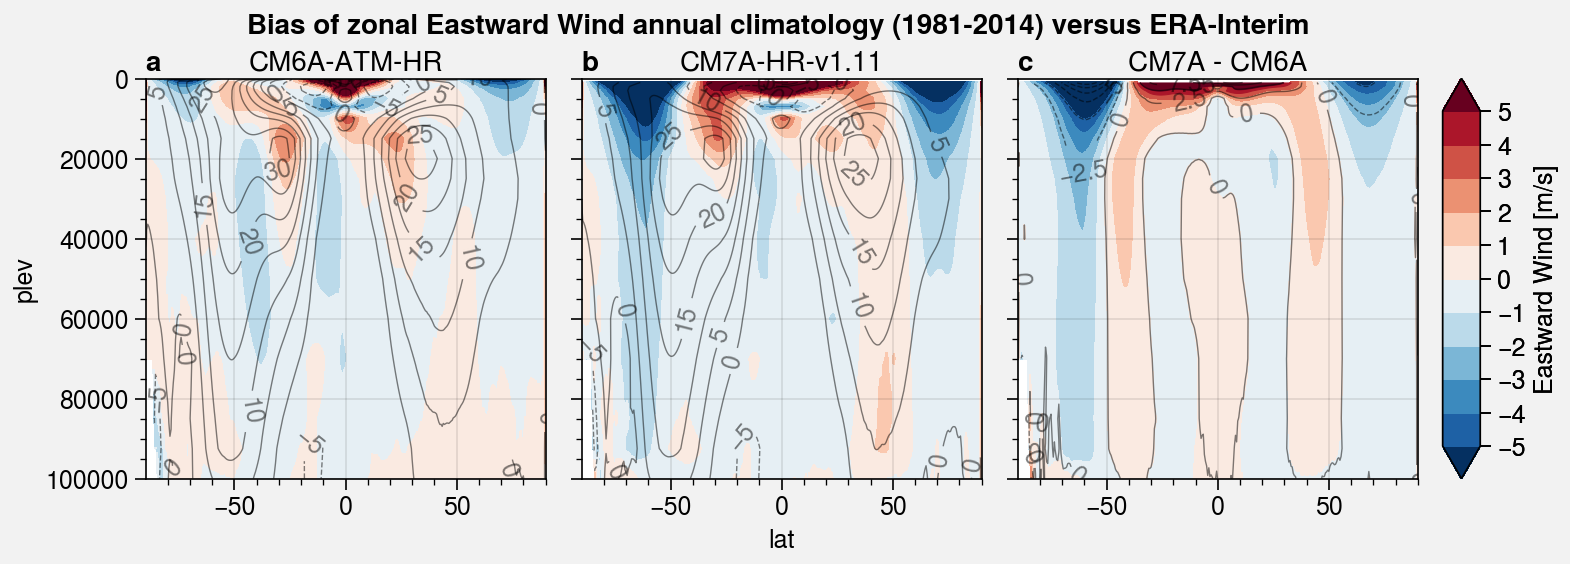

In [29]:
var = 'ua'
label = 'Eastward Wind'
units = 'm/s'
cmap = 'BuRd'
levels = plot.arange(-5,5,1)
extend = 'both'

ncols=3
lw=0.5
alpha=0.5
ylim=(100000,0)

f, axs = plot.subplots(ncols=3, nrows=1, axwidth=2)

list_models = ['CM6A-ATM-HR', 'CM7A-HR-v1.11', 'CM7A - CM6A']


for i in range(0,3):
    # Model
    m = axs[i].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[i].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[i].format(ylim=ylim, title=list_models[i])
    
f.colorbar(m, label=label + ' ['+units+']', loc='r')   


axs.format(
    suptitle="Bias of zonal "+label+" annual climatology ("+period.start+"-"+period.stop+") versus ERA-Interim ",
#     collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'],
#     rowlabels=list_models,
    abc = True
)

f.save('img/'+var+'_zonal_dynamico_sfromang_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_zonal_dynamico_'+period.start+'-'+period.stop+'.pdf')